In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
car_dataset = pd.read_csv("car data.csv")
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car_dataset.head(5)

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

In [ ]:
#checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [68]:
#one hot encoding to change textual data into numeric values

#encoding fuel type column
car_dataset.replace({'Fuel_Type': {'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)

#encoding seller type column
car_dataset.replace({'Seller_Type': {'Dealer':0, 'Individual':1}}, inplace=True)

#encoding transmission column
car_dataset.replace({'Transmission': {'Manual':0, 'Automatic':1}}, inplace=True)

car_dataset

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0       ritz  2014           3.35           5.59       27000          0   
1        sx4  2013           4.75           9.54       43000          1   
2       ciaz  2017           7.25           9.85        6900          0   
3    wagon r  2011           2.85           4.15        5200          0   
4      swift  2014           4.60           6.87       42450          1   
..       ...   ...            ...            ...         ...        ...   
296     city  2016           9.50          11.60       33988          1   
297     brio  2015           4.00           5.90       60000          0   
298     city  2009           3.35          11.00       87934          0   
299     city  2017          11.50          12.50        9000          1   
300     brio  2016           5.30           5.90        5464          0   

     Seller_Type  Transmission  Owner  
0              0             0      0  
1              0             0      0  
2              0             0      0  
3              0             0      0  
4              0             0      0  
..           ...           ...    ...  
296            0             0      0  
297            0             0      0  
298            0             0      0  
299            0             0      0  
300            0             0      0  

[301 rows x 9 columns]

In [ ]:
#splitting the data(independent variables) and target(dependent variables)
X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = car_dataset['Selling_Price']

In [ ]:
#splitting the data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [ ]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#model evaluation

#Prediction on training data
training_data_prediction = lin_reg.predict(X_train)

In [ ]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print(error_score)

0.8799451660493711


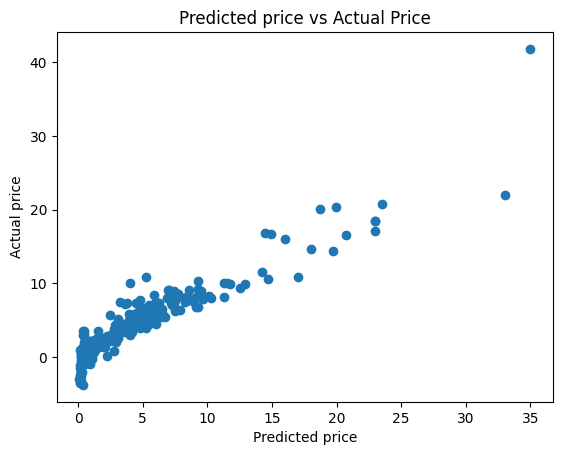

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Predicted price")
plt.ylabel("Actual price")
plt.title("Predicted price vs Actual Price")
plt.show()

In [ ]:
#Prediction on test data
test_data_prediction = lin_reg.predict(X_test)

In [ ]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print(error_score)

0.8365766715027051


In [ ]:
score = lin_reg.score(X_test, Y_test)
print(score)

0.8365766715027051


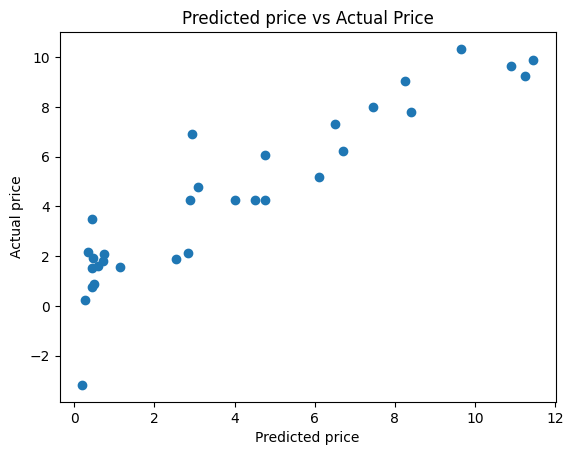

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Predicted price")
plt.ylabel("Actual price")
plt.title("Predicted price vs Actual Price")
plt.show()

In [ ]:
#Lasso Regression

lasso_reg = Lasso()

In [ ]:
lasso_reg.fit(X_train, Y_train)

Lasso()

In [ ]:
training_data_prediction = lasso_reg.predict(X_train)

In [ ]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print(error_score)

0.8427856123435794


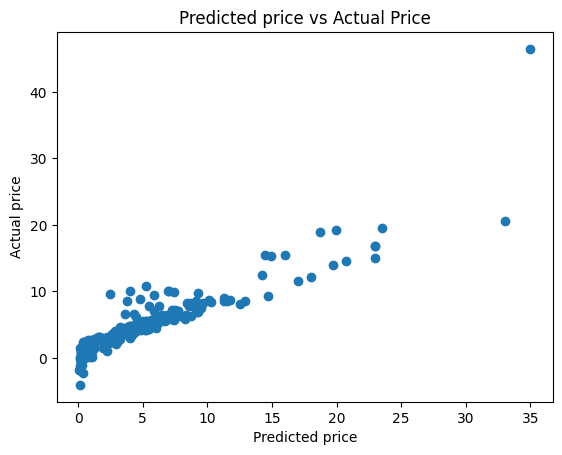

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Predicted price")
plt.ylabel("Actual price")
plt.title("Predicted price vs Actual Price")
plt.show()

In [ ]:
test_data_prediction = lasso_reg.predict(X_test)
print(test_data_prediction)

[ 9.87888122  1.42396266  4.33267834  3.17313445  8.95590579  4.29397384
  3.73913632  5.66283974  0.91478394  5.25514316  6.47238818  4.39507335
  1.2955156   8.26559961  2.00292338  2.32529219  2.55349653  2.34742172
  7.96895166  4.18441245  2.3369918   7.86598537  2.02308236  8.56734786
  1.55498136  6.48561097  2.11427451 -1.18422036  4.01710445  2.21749695
  2.41820898]


In [ ]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print(error_score)

0.8709167941173195


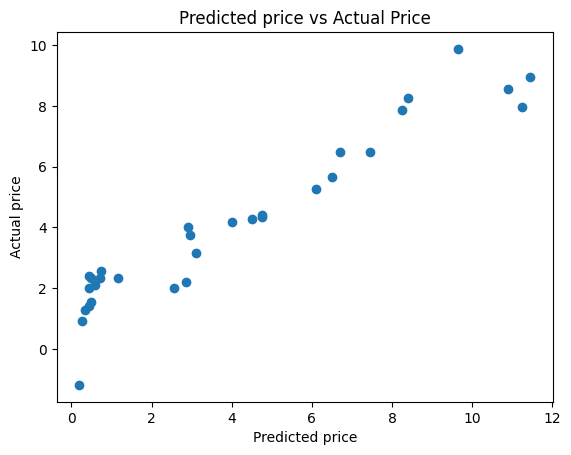

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Predicted price")
plt.ylabel("Actual price")
plt.title("Predicted price vs Actual Price")
plt.show()

In [ ]:
score = lasso_reg.score(X_test, Y_test)
print(score)

0.8709167941173195


In [66]:
X_test

Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
99   2010         20.450       50024          1            0             0   
161  2014          0.826       23000          0            1             0   
89   2014          6.760       40000          0            0             0   
30   2012          5.980       51439          1            0             0   
232  2015         14.790       12900          0            0             1   
290  2014          6.400       19000          0            0             0   
35   2011          7.740       49998          2            0             0   
7    2015          8.610       33429          1            0             0   
183  2013          0.470       21000          0            1             0   
13   2015          7.710       26000          0            0             0   
269  2015         10.000       18828          0            0             0   
65   2014          6.950       45000          1            0             0   
178  2014          0.520       19000          0            1             1   
258  2015         13.600       25000          0            0             0   
227  2011          4.430       57000          0            0             0   
133  2016          0.950         500          0            1             0   
130  2017          0.870       11000          0            1             0   
156  2017          0.520       15000          0            1             0   
237  2015         13.600       68000          1            0             0   
262  2015          5.800       40023          0            0             0   
112  2014          2.400        7000          0            1             0   
282  2014         14.000       63000          1            0             0   
164  2016          0.540       14000          0            1             0   
275  2016         13.600       30753          0            0             1   
154  2014          0.880        8000          0            1             0   
29   2015         10.380       45000          1            0             0   
141  2016          0.800       20000          0            1             0   
192  2007          0.750       49000          0            1             0   
216  2016          4.430       12500          0            0             0   
3    2011          4.150        5200          0            0             0   
159  2017          0.510        4000          0            1             1   

     Owner  
99       0  
161      0  
89       0  
30       0  
232      0  
290      0  
35       0  
7        0  
183      0  
13       0  
269      0  
65       0  
178      0  
258      0  
227      0  
133      0  
130      0  
156      0  
237      0  
262      0  
112      0  
282      0  
164      0  
275      0  
154      0  
29       0  
141      0  
192      1  
216      0  
3        0  
159      0

In [67]:
Y_test

99      9.65
161     0.45
89      4.75
30      3.10
232    11.45
290     4.50
35      2.95
7       6.50
183     0.27
13      6.10
269     6.70
65      4.75
178     0.35
258     8.40
227     2.55
133     0.72
130     0.75
156     0.48
237    11.25
262     4.00
112     1.15
282     8.25
164     0.45
275    10.90
154     0.50
29      7.45
141     0.60
192     0.20
216     2.90
3       2.85
159     0.45
Name: Selling_Price, dtype: float64

In [71]:
Final_predicted_data = X_test.join(Y_test)
Final_predicted_data

Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
99   2010         20.450       50024          1            0             0   
161  2014          0.826       23000          0            1             0   
89   2014          6.760       40000          0            0             0   
30   2012          5.980       51439          1            0             0   
232  2015         14.790       12900          0            0             1   
290  2014          6.400       19000          0            0             0   
35   2011          7.740       49998          2            0             0   
7    2015          8.610       33429          1            0             0   
183  2013          0.470       21000          0            1             0   
13   2015          7.710       26000          0            0             0   
269  2015         10.000       18828          0            0             0   
65   2014          6.950       45000          1            0             0   
178  2014          0.520       19000          0            1             1   
258  2015         13.600       25000          0            0             0   
227  2011          4.430       57000          0            0             0   
133  2016          0.950         500          0            1             0   
130  2017          0.870       11000          0            1             0   
156  2017          0.520       15000          0            1             0   
237  2015         13.600       68000          1            0             0   
262  2015          5.800       40023          0            0             0   
112  2014          2.400        7000          0            1             0   
282  2014         14.000       63000          1            0             0   
164  2016          0.540       14000          0            1             0   
275  2016         13.600       30753          0            0             1   
154  2014          0.880        8000          0            1             0   
29   2015         10.380       45000          1            0             0   
141  2016          0.800       20000          0            1             0   
192  2007          0.750       49000          0            1             0   
216  2016          4.430       12500          0            0             0   
3    2011          4.150        5200          0            0             0   
159  2017          0.510        4000          0            1             1   

     Owner  Selling_Price  
99       0           9.65  
161      0           0.45  
89       0           4.75  
30       0           3.10  
232      0          11.45  
290      0           4.50  
35       0           2.95  
7        0           6.50  
183      0           0.27  
13       0           6.10  
269      0           6.70  
65       0           4.75  
178      0           0.35  
258      0           8.40  
227      0           2.55  
133      0           0.72  
130      0           0.75  
156      0           0.48  
237      0          11.25  
262      0           4.00  
112      0           1.15  
282      0           8.25  
164      0           0.45  
275      0          10.90  
154      0           0.50  
29       0           7.45  
141      0           0.60  
192      1           0.20  
216      0           2.90  
3        0           2.85  
159      0           0.45